In [145]:
import pandas as pd
import numpy as np

In [146]:
## 결측치 확인
s1 = pd.Series([1, np.nan, 3, 4 ,5])
s2 = pd.Series([1, 2, np.nan, 4 ,5])
s3 = pd.Series([1, 2, 3, np.nan, 5])
df = pd.DataFrame({'s1' : s1,
                   's2' : s2,
                   's3' : s3
                   })

df

,s1,s2,s3
0,1.0,1.0,1.0
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN
4,5.0,5.0,5.0


In [147]:
## 결측치를 확인하는 함수 -> isna()

df.isna()
df['s1'].isna()

0    False
1     True
2    False
3    False
4    False
Name: s1, dtype: bool

In [148]:
## 결측치의 개수 -> isna().sum()

df.isna().sum()

s1    1
s2    1
s3    1
dtype: int64

In [149]:
## 결측치를 삭제하는 함수 -> dropna()
## axis 속성을 이용하여 축을 지정 -> 

df.dropna(axis=0)

,s1,s2,s3
0,1.0,1.0,1.0
4,5.0,5.0,5.0


In [150]:
## 결측치가 존재하는 열을 삭제

df.dropna(axis=1)

""
0
1
2
3
4


In [151]:
sales_records = pd.read_csv('C:/ubion/csv/Sales Records.csv')

sales_records

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [152]:
sales_records.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [153]:
sales_records["Total Cost"].describe()

count    1.000000e+04
mean     9.382658e+05
std      1.145914e+06
min      1.245600e+02
25%      1.647855e+05
50%      4.816058e+05
75%      1.183822e+06
max      5.241726e+06
Name: Total Cost, dtype: float64

In [154]:
## Order Date / Ship Date 컬럼의 데이터를 시계열 변경
sales_records["Order Date"] = pd.to_datetime(sales_records["Order Date"])

sales_records.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.5


In [155]:
sales_records["Ship Date"] = pd.to_datetime(sales_records["Ship Date"])


In [156]:
## 컬럼의 이름만 출력

sales_records.columns = ["대륙", "국가", "상품타입", "판매채널", "우선순위", "주문날짜",
                         "주문ID", "발송일자", "판매단위", "단가", "원가", "총수익", 
                         "총비용", "총이윤"]

In [157]:
## 데이터에서 소수점자리를 변경하면서 반올림

sales_records["총비용"].round(1)

0       2353920.6
1         34174.2
2        592409.0
3       3861014.8
4        110978.9
          ...    
9995     273298.6
9996     147991.5
9997     229507.3
9998    3174991.1
9999      35175.8
Name: 총비용, Length: 10000, dtype: float64

In [158]:
## 데이터의 타입을 변경 -> 총이윤 컬럼의 데이터 형태를 float -> int 변경

sales_records["총이윤"].astype(int)

sales_records["총이윤"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: 총이윤
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [159]:
## round.(0).astype(int) 동시에 사용

sales_records["총비용"] = sales_records["총비용"].round(1)

sales_records["총비용"].head(2)

0    2353920.6
1      34174.2
Name: 총비용, dtype: float64

In [160]:
## 컬럼의 데이터들을 그룹화하고 그 빈도의 수를 체크 함수
## value_counts()

sales_records["국가"].value_counts() 

United Kingdom    72
Lithuania         72
Moldova           71
Seychelles        70
Croatia           70
                  ..
Slovakia          42
Greenland         41
Tajikistan        40
Saint Lucia       39
Mali              35
Name: 국가, Length: 185, dtype: int64

In [161]:
sales_records.groupby(["국가", "상품타입"]).sum()["총이윤"]

국가           상품타입           
Afghanistan  Baby Food           131136.48
             Beverages           225190.80
             Cereal             4865097.03
             Clothes            2194901.28
             Cosmetics          2117214.99
                                   ...    
Zimbabwe     Meat                551408.00
             Office Supplies    2202683.75
             Personal Care       463058.68
             Snacks              899553.96
             Vegetables         2142947.85
Name: 총이윤, Length: 2198, dtype: float64

In [162]:
corona = pd.read_csv("../csv/corona.csv")

corona.head(2)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN


In [163]:
corona = corona.reset_index().drop("index", axis=1)
corona = corona.reset_index(drop=True)

In [164]:
corona["일일확진자"] = (corona["decideCnt"].shift() - corona["decideCnt"]).fillna(0)

corona.head(2)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN,0.0
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,13358.0


In [165]:
corona["H/L"] = corona["accDefRate"].apply(lambda x : "High" if( x >= 3.5) else  "Low")

corona.head(2)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,H/L
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN,0.0,Low
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,13358.0,Low


In [166]:
def HL(x):
    if (x > 3.5):
        return "High"
    else:
        return "Low"

corona["H/L_2"] = corona["accDefRate"].apply(HL)
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,H/L,H/L_2
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN,0.0,Low,Low
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,13358.0,Low,Low
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,6172.0,Low,Low
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,5022.0,Low,Low
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,9834.0,Low,Low


In [167]:
corona["createDt"] = pd.to_datetime(corona["createDt"])

In [168]:
corona["요일"] = corona["createDt"].dt.weekday

corona.head(2)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,H/L,H/L_2,요일
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN,0.0,Low,Low,2
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,13358.0,Low,Low,1


In [169]:
corona_week = corona.groupby("요일").mean()

corona_week.head()

,Unnamed: 0,deathCnt,decideCnt,seq,stateDt,accExamCnt,accDefRate,일일확진자
요일,,,,,,,,
0,408.224138,3978.267241,1.947711e+06,473.750000,2.020901e+07,7.594898e+06,1.554308,22155.275862
1,410.415254,3954.652542,1.937736e+06,471.364407,2.020895e+07,7.437156e+06,1.575322,26994.550847
2,409.415254,3982.805085,1.964730e+06,472.627119,2.020895e+07,7.472065e+06,1.558561,25339.855932
3,408.965517,3873.922414,1.867492e+06,472.991379,2.020893e+07,7.576033e+06,1.554854,22736.706897
4,410.923077,3875.923077,1.874167e+06,470.940171,2.020893e+07,7.541537e+06,1.551521,22555.948718


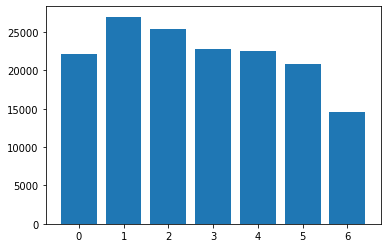

In [170]:
import matplotlib.pyplot as plt

y = corona_week["일일확진자"].tolist()
x = corona_week.index

plt.bar(x, y)
plt.show()

In [171]:
tran_1 = pd.read_csv("../csv/transaction_1.csv")
tran_2 = pd.read_csv("../csv/transaction_2.csv")

# pd.concat([tran_1, tran_2]).reset_index(drop=True)

tran = pd.concat([tran_1, tran_2], ignore_index=True)

tran_d_1 = pd.read_csv("../csv/transaction_detail_1.csv")
tran_d_2 = pd.read_csv("../csv/transaction_detail_2.csv")

tran_d = pd.concat([tran_d_1, tran_d_2], ignore_index=True)

In [175]:
pd.merge(tran, tran_d, on="transaction_id", how="left")

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1
